# 1. statsmodels 패키지
* 아래와 같은 기능을 제공하는 파이썬 패키지
    * 검정 및 추정 (test and estimation)
    * 회귀 분석 (regression analysis)
    * 시계열 분석 (time-series analysis)
* 회귀분석의 경우 R-style 모형 기술을 가능하게 하는 patsy 패키지를 포함  
→ 기존에 R에서만 가능했던 회귀 분석과 시계열 분석 방법론을 그대로 파이썬에서 이용할 수 있게 됨
* statsmodels 패키지의 개발 목표 중 하나는 기존 R의 통계 분석 및 시계열 분석 지원

In [1]:
# statsmodels 패키지를 사용할 때는 api 서브패키지를 import하여 사용한다.
import statsmodels.api as sm

# 2. statsmodels에서 제공하는 데이터셋
* R에서 사용하던 1000개 이상의 표준 데이터셋을 사용할 수 있도록 지원한다.
* 참조
    * https://github.com/vincentarelbundock/Rdatasets
* 위 프로젝트에서 제공하는 데이터셋 목록
    * http://vincentarelbundock.github.io/Rdatasets/datasets.html
* 이 목록에 있는 데이터 가져오는 방법
    * "Package" 이름과 "Item"을 알아낸 뒤 `get_rdataset` 명령 이용
    
##### get_rdataset
표준 데이터셋을 가져온다.
* statsmodels의 datasets 서브패키지에 있는 함수
* 이 함수는 인터넷에서 데이터를 다운로드 받으므로 인터넷에 연결되어 있어야 한다.

`get_rdataset(item, [package="datasets"])`  
* `item` : 해당 데이터의 "Item"
* `package` : 데이터를 제공하는 R 패키지 이름, 해당 데이터의 "Package"
    * "Package" 이름이 `datasets`인 경우 생략 가능
* `title` : 데이터 이름
* `data` : 데이터를 담고 있는 데이터프레임
* `__doc__` : 데이터에 대한 설명 문자열
    * 이 설명은 R 패키지의 내용을 그대로 가져온 것. 즉 예제 코드가 R로 되어 있어 파이썬에서 바로 사용할 수 없다. 

# 3. 데이터셋 예1: 타이타닉 탑승자
`datasets` 패키지의 `Titanic` 데이터

In [4]:
data = sm.datasets.get_rdataset("Titanic", package="datasets") 
df = data.data
df.tail()

,Class,Sex,Age,Survived,Freq
27,Crew,Male,Adult,Yes,192
28,1st,Female,Adult,Yes,140
29,2nd,Female,Adult,Yes,80
30,3rd,Female,Adult,Yes,76
31,Crew,Female,Adult,Yes,20


In [6]:
# 데이터에 포함된 설명
print(data.__doc__)

+---------+-----------------+
| Titanic | R Documentation |
+---------+-----------------+

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

   Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

+----+----------+---------------------+
| No | Name     | Levels              |
+----+----------+---------------------+
| 1  | Class    | 1st, 2nd, 3rd, Crew |
+----+----------+---------------------+
| 2  | Sex      | Male, Female        |
+----+----------+---------------------+
| 3  | Age      | Child, Adult        |
+----+----------+---------------------+
| 4  | Survived | No, Yes             |
+----+----------+-------------------

# 4. 데이터셋 예2: 미국 강수량
`datasets` 패키지의 `precip` 데이터

In [10]:
data = sm.datasets.get_rdataset("precip")
df = data.data
df.tail()

,dat
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


In [11]:
print(data.__doc__)

+--------+-----------------+
| precip | R Documentation |
+--------+-----------------+

Annual Precipitation in US Cities
---------------------------------

Description
~~~~~~~~~~~

The average amount of precipitation (rainfall) in inches for each of 70
United States (and Puerto Rico) cities.

Usage
~~~~~

::

   precip

Format
~~~~~~

A named vector of length 70.

Note
~~~~

The dataset version up to Nov.16, 2016 had a typo in ``"Cincinnati"``'s
name. The examples show how to recreate that version.

Source
~~~~~~

Statistical Abstracts of the United States, 1975.

References
~~~~~~~~~~

McNeil, D. R. (1977) *Interactive Data Analysis*. New York: Wiley.

Examples
~~~~~~~~

::

   require(graphics)
   dotchart(precip[order(precip)], main = "precip data")
   title(sub = "Average annual precipitation (in.)")

   ## Old ("wrong") version of dataset (just name change):
   precip.O <- local({
      p <- precip; names(p)[names(p) == "Cincinnati"] <- "Cincinati" ; p })
   stopifnot(all(precip 

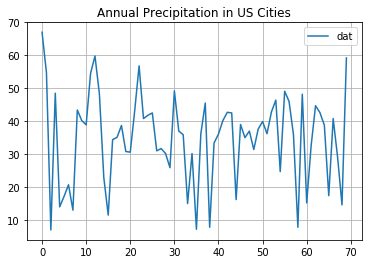

In [15]:
import matplotlib.pyplot as plt

df.plot()
plt.title(data.title)
plt.grid()
plt.show()

# 5. 데이터셋 예3: 황체형성 호르몬(Luteinizing Hormone) 수치 시계열
`dataset` 패키지의 `lh` 데이터

In [18]:
data = sm.datasets.get_rdataset("lh")
df = data.data
df.tail()

,time,value
43,44,2.6
44,45,2.1
45,46,3.4
46,47,3.0
47,48,2.9


In [19]:
print(data.__doc__)

+----+-----------------+
| lh | R Documentation |
+----+-----------------+

Luteinizing Hormone in Blood Samples
------------------------------------

Description
~~~~~~~~~~~

A regular time series giving the luteinizing hormone in blood samples at
10 mins intervals from a human female, 48 samples.

Usage
~~~~~

::

   lh

Source
~~~~~~

P.J. Diggle (1990) *Time Series: A Biostatistical Introduction.* Oxford,
table A.1, series 3



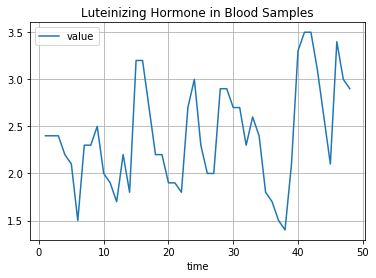

In [21]:
df.plot(x="time", y="value")
plt.title(data.title)
plt.grid()
plt.show()

# 6. 데이터셋 예 4: 호흡기 질환 사망자수
`MASS` 패키지의 `deaths` 데이터
* 1974-1979년 사이의 영국의 호흡기 질환 사망자 수를 나타내는 시계열 데이터

In [22]:
data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.tail()

,time,value
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


In [23]:
print(data.__doc__)

+--------+-----------------+
| deaths | R Documentation |
+--------+-----------------+

Monthly Deaths from Lung Diseases in the UK
-------------------------------------------

Description
~~~~~~~~~~~

A time series giving the monthly deaths from bronchitis, emphysema and
asthma in the UK, 1974-1979, both sexes (``deaths``),

Usage
~~~~~

::

   deaths

Source
~~~~~~

P. J. Diggle (1990) *Time Series: A Biostatistical Introduction.*
Oxford, table A.3

References
~~~~~~~~~~

Venables, W. N. and Ripley, B. D. (2002) *Modern Applied Statistics with
S.* Fourth edition. Springer.

See Also
~~~~~~~~

This the same as dataset ``ldeaths`` in R's datasets package.



* 이 시계열 데이터의 시간 인코딩
    * 시간 - 1년을 1.0으로  
      1개월 - 1/12로 하는 값 (year-fraction)  
* 이 값을 파이썬의 datetime 포맷으로 변경할 필요가 있음

In [43]:
# datatime 포맷으로 변경하는 함수
def yearfraction2datetime(yearfraction, startyear=0):
    import datetime
    import dateutil
    
    year = int(yearfraction) + startyear
    month = int(round(12 * (yearfraction - year)))
    delta = dateutil.relativedelta.relativedelta(months=month)
    date = datetime.datetime(year, 1, 1) + delta
    
    return date

In [44]:
df["datetime"] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
67,1979.583333,1354,1979-08-01
68,1979.666667,1333,1979-09-01
69,1979.750000,1492,1979-10-01
70,1979.833333,1781,1979-11-01
71,1979.916667,1915,1979-12-01


이 데이터는 계절에 따른 패턴 즉, 계절성(seasonality)을 보이는 시계열이다.

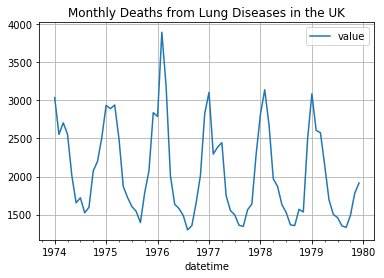

In [46]:
df.plot(x="datetime", y="value")
plt.title(data.title)
plt.grid()
plt.show()

# 7. 데이터셋 예 5: 항공 운송인원
`datasets` 패키지의 `deaths` 데이터
* 1949-1960년 사이의 국제 항공 운송인원을 나타내는 시계열 데이터

In [47]:
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data
df.tail()

,time,value
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [48]:
print(data.__doc__)

+---------------+-----------------+
| AirPassengers | R Documentation |
+---------------+-----------------+

Monthly Airline Passenger Numbers 1949-1960
-------------------------------------------

Description
~~~~~~~~~~~

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

Usage
~~~~~

::

   AirPassengers

Format
~~~~~~

A monthly time series, in thousands.

Source
~~~~~~

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) *Time Series
Analysis, Forecasting and Control.* Third Edition. Holden-Day. Series G.

Examples
~~~~~~~~

::

   ## Not run: 
   ## These are quite slow and so not run by example(AirPassengers)

   ## The classic 'airline model', by full ML
   (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                 seasonal = list(order = c(0, 1, 1), period = 12)))
   update(fit, method = "CSS")
   update(fit, x = window(log10(AirPassengers), start = 1954))
   pred <- predict(fit, n.ahead = 24)
   tl <- pred$pred 

In [49]:
df["datetime"] = df.time.map(yearfraction2datetime)
df.tail()

,time,value,datetime
139,1960.583333,606,1960-08-01
140,1960.666667,508,1960-09-01
141,1960.750000,461,1960-10-01
142,1960.833333,390,1960-11-01
143,1960.916667,432,1960-12-01


이 데이터는 계절성과 증가 추세(trend)를 동시에 보이고 있다.

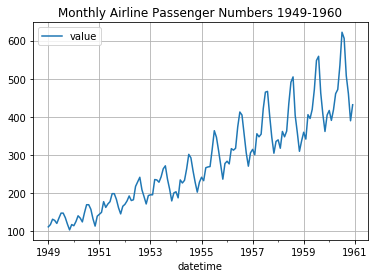

In [50]:
df.plot(x="datetime", y="value")
plt.title(data.title)
plt.grid()
plt.show()